                                      Final Project
    
Project Overview:
    
The purpuse of this project is to see the relationship between the GDP and the unemployment rate in U.S. In this project, we have time series data of the GDP and the unemployment rate for the U.S. According to the theory, the GDP and the unemployment rate has a negative relationship. We will use linear regression analysis to test whether the GDP will influence the unemployment rate. 

Project Structure:
    
This projects consist of three parts starting by providing the data and explaining where the data comes from and how to access it.
The second part will focus on providing summary statistics showing the relationship between GDP and unemployment rate while giving visuals of the statistics to help illustrate the project.
The third part of the project will have a hypothesis which will be compared with trends in previous scholarship. To test the hypothesis a linear regression will be preformed and the results will be stated. Finally, there will be a discussion of the test results and whether or not it follows previous scholarship.

Data Report: 

The data for this project comes from Federal Reserve Economics Data webside (FRED). FRED provides quartertly data on the U.S. GDP and unemploment rate from 1950. It also provides quarterly data on Personal Consumption Expenditures, Gross Private Domestic Investment, Government total expenditures, and Net Exports of Goods and Services, which is realtes to how to calculate GDP. The data can be accessed at https://fred.stlouisfed.org. 

Key Variables: 

The two key variables in this project are GDP and unemployment rate. FRED defines GDP by county as the following: "a measure of the market value of final goods and services produced within a county area in a particular period. While other measures of county economies rely mainly on labor market data, these statistics incorporate multiple data sources that capture trends in labor, revenue, and value of production. As a result, the capital-intensive industries are captured more fully than when measured solely by labor data."

FRED defines unemployment rate as the following: "Unemployed persons are all persons who had no employment during the reference week, were available for work, except for temporary illness, and had made specific efforts to find employment some time during the 4 week-period ending with the reference week. ... The unemployment rate is the unemployed percent of the civilian labor force (100 times (unemployed/civilian labor force))."

In [1]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [6]:
#Access Data
url = 'file:///Users/leonelmurillo/Downloads/CALOSA7URN.csv'
data.describe()
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,CALOSA7URN
0,1/1/90,6.0
1,2/1/90,5.7
2,3/1/90,5.4
3,4/1/90,5.6
4,5/1/90,5.5


In [7]:
data.columns=['DATE','URATE']

In [32]:
data.head()

,DATE,GDPALL06037
0,2001-01-01,391964208
1,2002-01-01,408637634
2,2003-01-01,432228920
3,2004-01-01,460582475
4,2005-01-01,488160435


In [9]:
#Summary Statistics for Unemployment Rate
data.describe()

,URATE
count,369.000000
mean,7.611382
std,2.760638
min,4.000000
25%,5.400000
50%,6.800000
75%,9.400000
max,20.800000


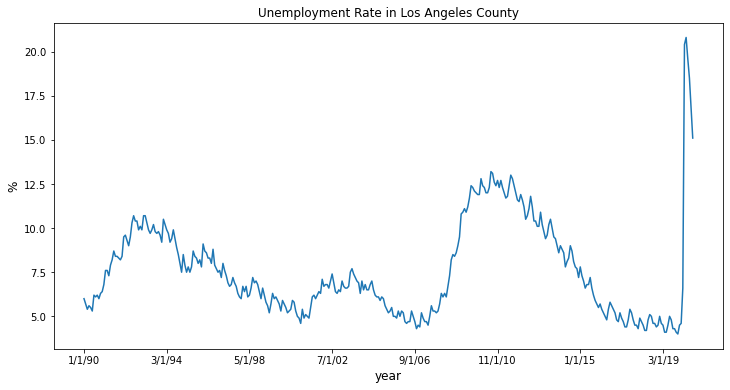

In [30]:
#Graphing the Unemployment Rate
data_l = data.set_index('DATE')
a = data_l['1/1/90':'9/1/20'].plot(title='Unemployment Rate in Los Angeles County', legend=False, figsize=(12,6))
a.set_xlabel('year', fontsize=12)
a.set_ylabel('%', fontsize=12)
plt.show()

In [31]:
#Access Data
url = 'file:///Users/leonelmurillo/Downloads/GDPALL06037.csv'
data.describe()
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,GDPALL06037
0,2001-01-01,391964208
1,2002-01-01,408637634
2,2003-01-01,432228920
3,2004-01-01,460582475
4,2005-01-01,488160435


In [33]:
data.columns=['DATE','GDP']

In [34]:
data.head()

,DATE,GDP
0,2001-01-01,391964208
1,2002-01-01,408637634
2,2003-01-01,432228920
3,2004-01-01,460582475
4,2005-01-01,488160435


In [35]:
#Summary Statistics for GDP
data.describe()

,GDP
count,1.800000e+01
mean,5.706826e+08
std,1.145131e+08
min,3.919642e+08
25%,4.966201e+08
50%,5.567610e+08
75%,6.413454e+08
max,7.871767e+08


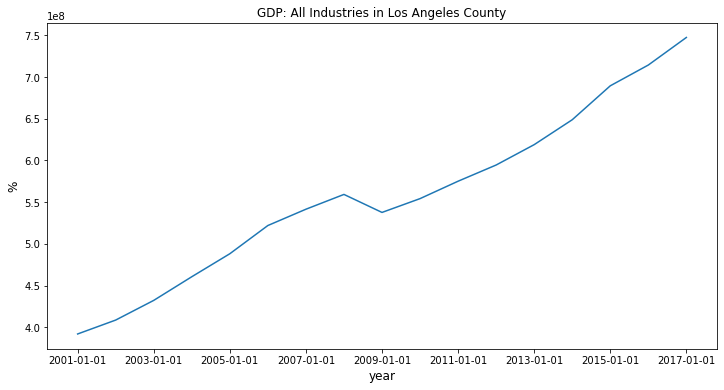

In [36]:
#Graphing the GDP
data_l = data.set_index('DATE')
a = data_l['2001':'2018'].plot(title='GDP: All Industries in Los Angeles County', legend=False, figsize=(12,6))
a.set_xlabel('year', fontsize=12)
a.set_ylabel('%', fontsize=12)
plt.show()